In [47]:
import os
import numpy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
data = pd.read_csv('amazon.csv',encoding='iso-8859-1', parse_dates = ['date'])
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [35]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [14]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [15]:
data.shape

(6454, 5)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [17]:
data.describe()

,year,number,date
count,6454.000000,6454.000000,6454
mean,2007.461729,108.293163,2007-06-18 18:28:53.622559488
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2002.000000,3.000000,2002-01-01 00:00:00
50%,2007.000000,24.000000,2007-01-01 00:00:00
75%,2012.000000,113.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.746654,190.812242,NaN


__Checking for duplicate enteries__

In [21]:
dup_data = data.duplicated().any()
dup_data

True

In [22]:
data.drop_duplicates()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


__Check Null Values In The Dataset__

In [24]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

__Get Overall Statistics About The Dataframe__

In [26]:
data.describe(include = 'all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Janeiro,NaN,NaN
freq,NaN,717,541,NaN,NaN
mean,2007.461729,NaN,NaN,108.293163,2007-06-18 18:28:53.622559488
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2002.000000,NaN,NaN,3.000000,2002-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.000000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,113.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


__Rename Month Names To English__

In [36]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [37]:
data['month_new'] = data['month'].replace({'Janeiro': 'January','Fevereiro':'February','Março':'March',
                                  'Abril':'April','Maio':'May','Junho':'June','Julho':'July',
                                  'Agosto': 'August','Setembro':'September','Outubro':'October',
                                  'Novembro':'November','Dezembro':'December'})

In [38]:
data['month_new'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

__Total Number of Fires Registered__

In [32]:
data.shape

(6454, 5)

__In Which Month Maximum Number of Forest Fires Were Reported?__

In [39]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [53]:
max_fire_month = data.groupby('month_new')['number'].sum().reset_index()

In [54]:
max_fire_month

,month_new,number
0,April,28188.770
1,August,88050.435
2,December,57535.480
3,February,30848.050
4,January,47747.844
5,July,92326.113
6,June,56010.675
7,March,30717.405
8,May,34731.363
9,November,85508.054


In [55]:
max_fire_month.columns

Index(['month_new', 'number'], dtype='object')

<Axes: xlabel='month_new', ylabel='number'>

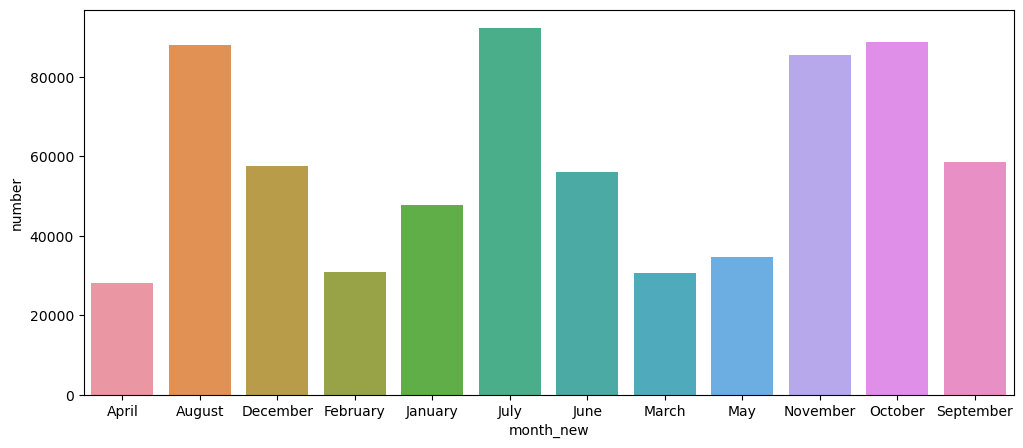

In [60]:
plt.figure(figsize = (12,5))
sns.barplot( x = 'month_new', y = 'number', data = max_fire_month)

__In Which Year Maximum Number of Forest Fires Was Reported?__

In [61]:
agg_data = data.groupby('year')['number'].sum().reset_index()
agg_data

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


<Axes: xlabel='year', ylabel='number'>

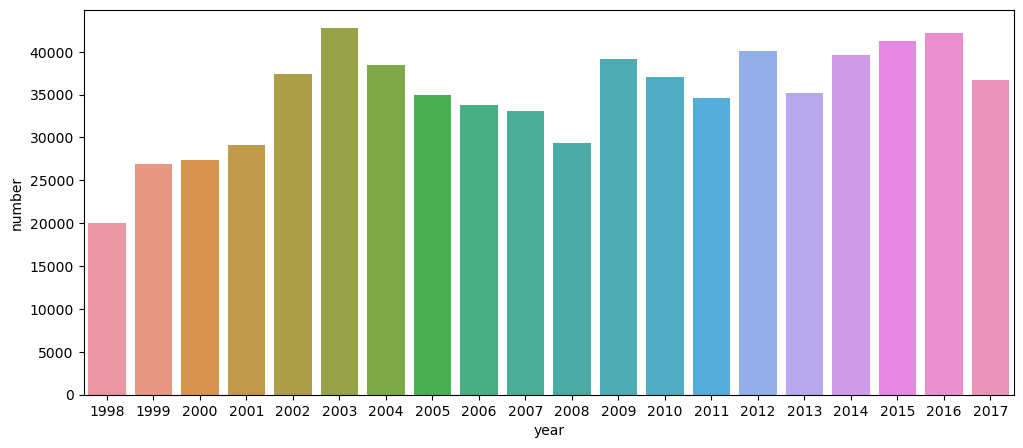

In [62]:
plt.figure(figsize = (12,5))
sns.barplot( x = 'year', y = 'number', data = agg_data)

__In Which State Maximum Number of Forest Fires Was Reported?__

In [63]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [65]:
state_max = data.groupby('state')['number'].sum().reset_index()
state_max

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


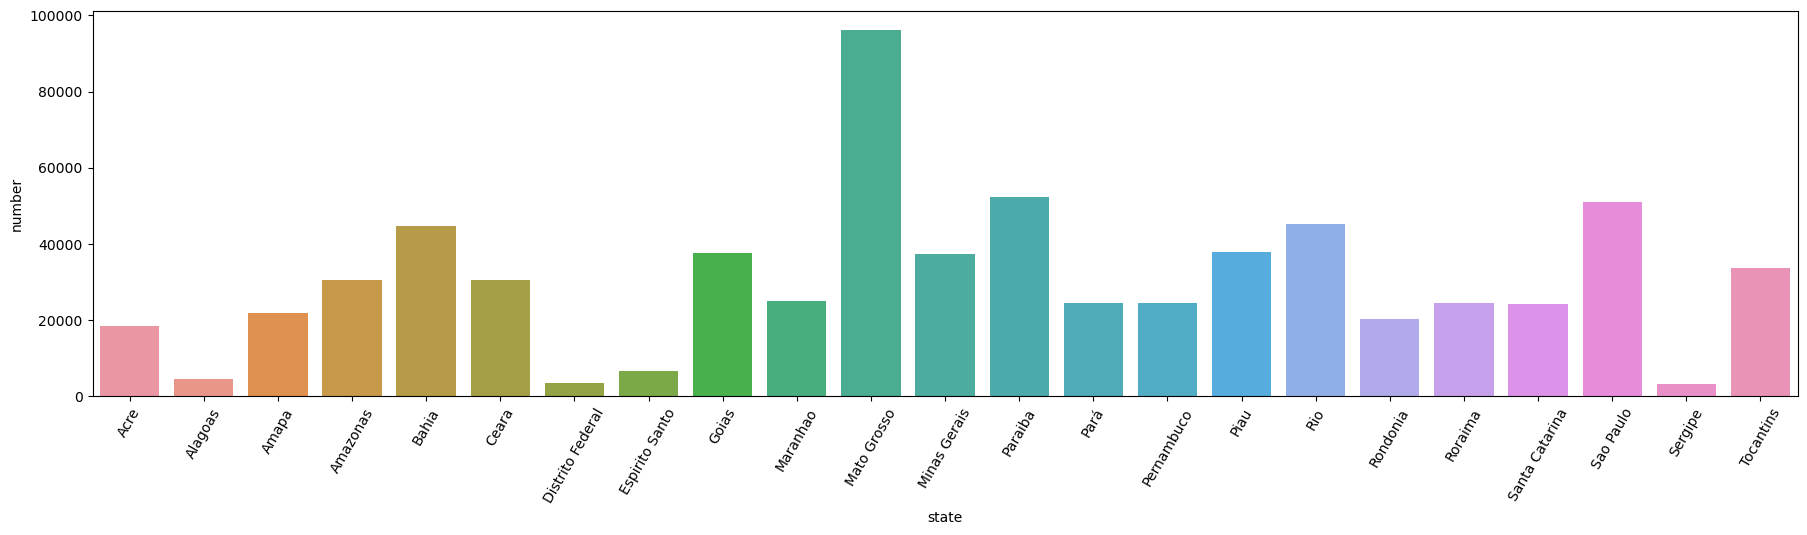

In [71]:
plt.figure(figsize = (22,5))
sns.barplot( x = 'state', y = 'number', data = state_max)
plt.xticks(rotation = 60)
plt.show()

__Find Total Number of Fires Were Reported In Amazonas__

In [72]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [83]:
data[data['state']=="Amazonas"]['number'].sum()


30650.129

__Display Number of Fires Were Reported In Amazonas (Year-Wise)__

In [85]:
amaz_fires = data[data['state']=="Amazonas"]
amaz_fires

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [89]:
amaz_fires_yr = amaz_fires.groupby('year')['number'].sum().reset_index()
amaz_fires_yr

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

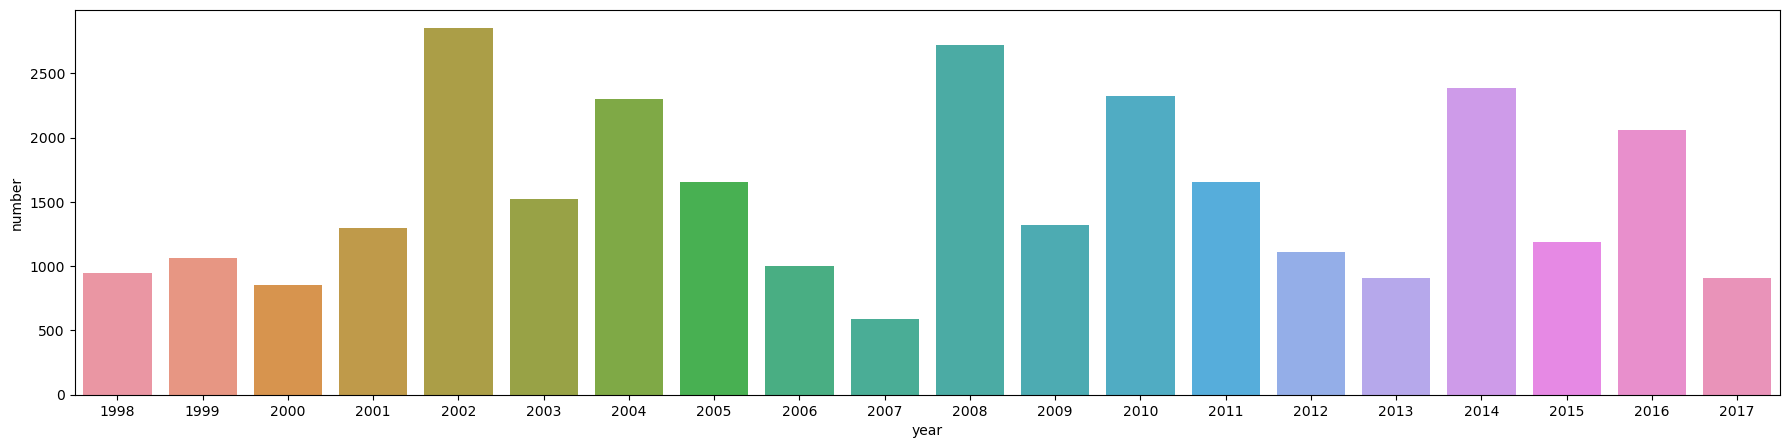

In [90]:
plt.figure(figsize = (22,5))
sns.barplot( x = 'year', y = 'number', data = amaz_fires_yr)

__Display Number of Fires Were Reported In Amazonas (Day-Wise)__

In [107]:
amaz_fires.dtypes

year                  int64
state                object
month                object
number              float64
date         datetime64[ns]
month_new            object
dtype: object

In [126]:
amaz_fires['date'] = pd.to_datetime(amaz_fires['date'])

amaz_fires['day_of_week'] = amaz_fires['date'].dt.day_name()
amaz_fires

,year,state,month,number,date,month_new,day_of_week
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January,Thursday
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January,Friday
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January,Saturday
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January,Monday
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January,Tuesday
...,...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December,Sunday
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December,Tuesday
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December,Wednesday
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December,Thursday


In [127]:
amaz_fires_day = amaz_fires.groupby('day_of_week')['number'].sum().reset_index()
amaz_fires_day

,day_of_week,number
0,Friday,5446.480
1,Monday,1886.601
2,Saturday,4162.666
3,Sunday,3015.186
4,Thursday,5754.802
5,Tuesday,6474.217
6,Wednesday,3910.177


<Axes: xlabel='day_of_week', ylabel='number'>

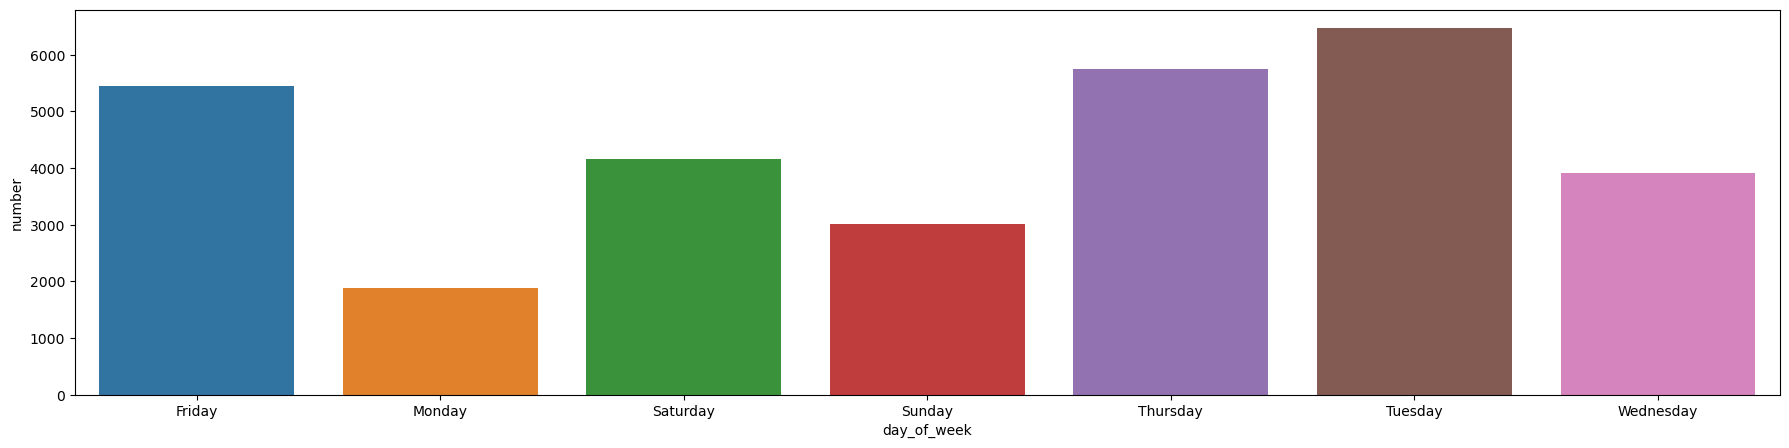

In [128]:
plt.figure(figsize = (22,5))
sns.barplot( x = 'day_of_week', y = 'number', data = amaz_fires_day)

__Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’__

In [129]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [141]:
fire = data[data['year']== 2015].groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<Axes: xlabel='month_new', ylabel='number'>

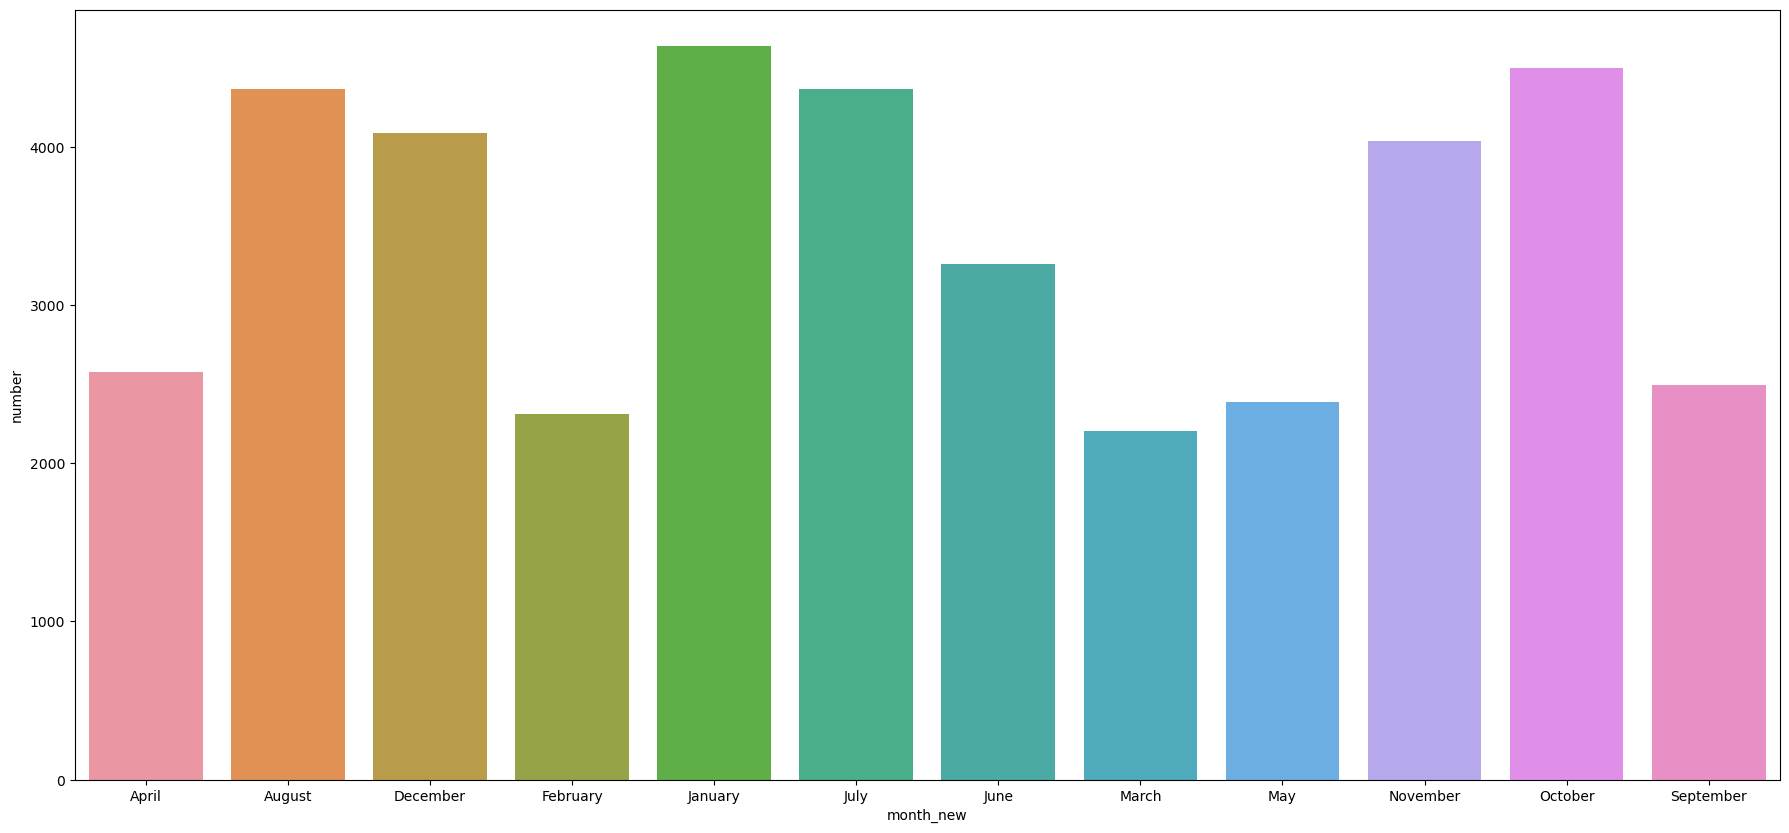

In [144]:
plt.figure(figsize = (22,10))
sns.barplot( x = 'month_new', y = 'number', data = fire)

__Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)__

In [145]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [150]:
state_wise = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
state_wise

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


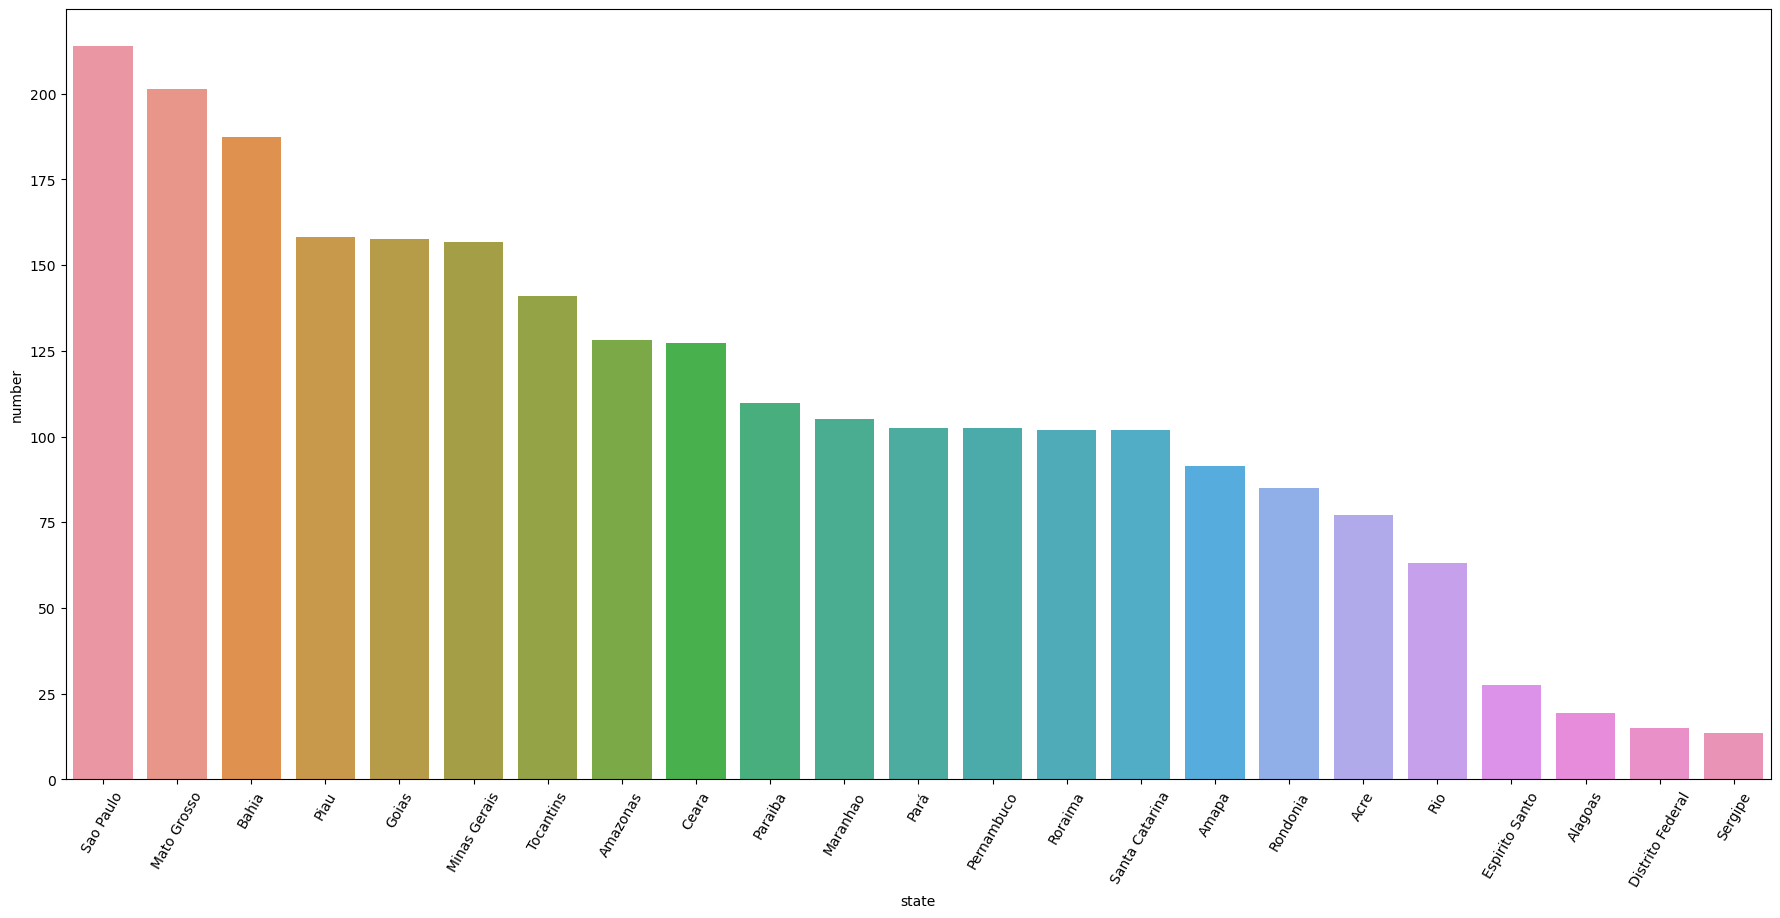

In [152]:
plt.figure(figsize = (22,10))
sns.barplot( x = 'state', y = 'number', data = state_wise)
plt.xticks(rotation = 60)
plt.show()


__To Find The State Names Where Fires Were Reported In 'dec' Month__

In [164]:
data[data['month_new']=='December']['state'].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)